## 1 Hidden Layer : 2 neuron, 1 Output Layer
## Explicit network definition

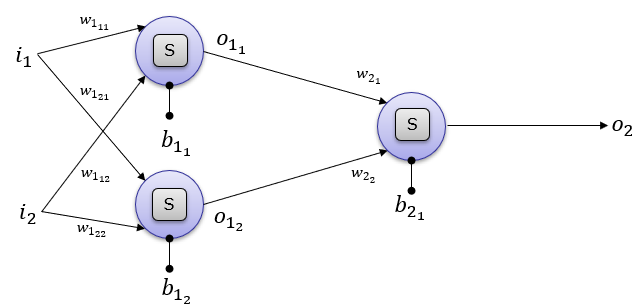

In [1]:
from IPython.display import Image
Image(filename = "nn_img/Python_Pytorch_nn_Sequential_i2_H1_n2_o1_sigmoid_01a.png", width=500)

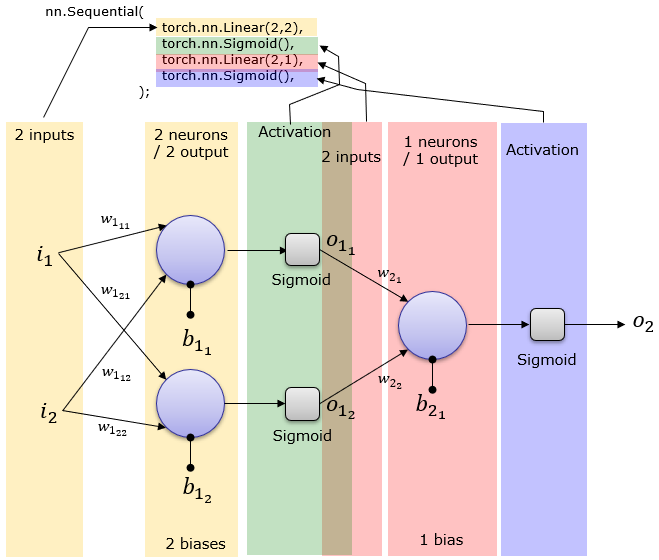

In [2]:
from IPython.display import Image
Image(filename = "nn_img/Python_Pytorch_nn_Sequential_i2_H1_n2_o1_sigmoid_01.png", width=500)

# Prerequisites

In [3]:
import torch
from torch import nn
from torch import optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from draw import display_solution

#predictive
torch.manual_seed(1);

device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')  
    
#sigmoid explicit
def sigmoid(x):
    return 1/(1+torch.exp(-x))

#sigmoid pre-defined
activation = torch.nn.Sigmoid()

# Loss (Binary Cross Entropy) error function, explicit def
def bce_err(output, target):
    return -target * torch.log(output) - (1-target) * torch.log(1-output)

#sigmoid + BCELoss (Binary Cross Entropy)
criterion = torch.nn.BCEWithLogitsLoss()

def state(interval,i,loss,out,y):
    if(i%interval == 0):
        print("\n========== Epoch", i,"==========")
        print("loss=",loss)
        accuracy = np.mean( ((out > 0.5)==y).numpy() )
        print("accuracy=",accuracy)
        
#array data points: x1, x2
data = np.array([
    [1,10,1],
    [3,10,0],
    [1.8,2.0,0],
    [-1,-1,1],
    [-2,10,1],
])         

#df = pd.read_csv('test.csv', header=None)
#df = pd.read_csv('data2.csv', header=None)
#data = df.to_numpy()        

### Explicit network definition

In [4]:
#features
x = torch.from_numpy(data[:, [0,1]]).double()
#target/labels
y = torch.from_numpy(data[:, [2]]).double()

torch.manual_seed(1);

# Define the size of each layer in our network
n_input = 2    # Number of input units, must match number of input features
n_hidden = 2   # Number of hidden units 
n_output = 1   # Number of output units

# Weights for inputs to hidden layer
w1 = torch.randn(n_input, n_hidden, dtype=torch.double, requires_grad=True)
# Weights for hidden layer to output layer
w2 = torch.randn(n_hidden, n_output, dtype=torch.double, requires_grad=True)

# and bias terms for hidden and output layers
b1 = torch.randn(1, n_hidden, dtype=torch.double, requires_grad=True)
b2 = torch.randn(1, n_output, dtype=torch.double, requires_grad=True)

h = activation(torch.mm(x,w1) + b1)
output = activation(torch.mm(h,w2) + b2)

print(x)
print(w1)
print(b1)
print(w2)
print(b2)
print(output)

tensor([[ 1.0000, 10.0000],
        [ 3.0000, 10.0000],
        [ 1.8000,  2.0000],
        [-1.0000, -1.0000],
        [-2.0000, 10.0000]], dtype=torch.float64)
tensor([[0.6614, 0.2669],
        [0.0617, 0.6213]], dtype=torch.float64, requires_grad=True)
tensor([[-1.5228,  0.3817]], dtype=torch.float64, requires_grad=True)
tensor([[-0.4519],
        [-0.1661]], dtype=torch.float64, requires_grad=True)
tensor([[-1.0276]], dtype=torch.float64, requires_grad=True)
tensor([[0.1991],
        [0.1779],
        [0.2013],
        [0.2435],
        [0.2249]], dtype=torch.float64, grad_fn=<SigmoidBackward>)


In [5]:
#learn rate
alpha = 0.01
#iterations
epochs = 1001
#display state
fv = 100

lossHistory = []
predictionHistory = []

#optional manually set weights
#w1 = torch.tensor( [[1, 1],
#                    [1, 1]], dtype=torch.float64, requires_grad=True)
#b1 = torch.tensor( [[1, 1]], dtype=torch.float64, requires_grad=True)

#w2 = torch.tensor( [[ 1],
#                    [10]], dtype=torch.float64, requires_grad=True)
#b2 = torch.tensor( [[ 1]], dtype=torch.float64, requires_grad=True)

for i in range(epochs):
    
    #forward: output/prediction
    h = activation(torch.mm(x,w1) + b1) 
    out = activation(torch.mm(h,w2) + b2)    
    
    loss = torch.mean(bce_err(out,y))
    
    #alternative
    #out = torch.mm(X, W.view(2,1))+b
    #loss = criterion(out, y)  
      
    #backward: compute gradients
    loss.backward()   

    #update weights (disable gradients when update weights)
    with torch.no_grad():
        w1 -= alpha * w1.grad
        b1 -= alpha * b1.grad
        w2 -= alpha * w2.grad
        b2 -= alpha * b2.grad        

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        b1.grad.zero_()    
        w2.grad.zero_()
        b2.grad.zero_()    
        
    lossHistory.append(loss)    

    state(fv,i,loss,out,y)


========== Epoch 0 ==========
loss= tensor(0.9878, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 0.4

========== Epoch 100 ==========
loss= tensor(0.8010, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 0.4

========== Epoch 200 ==========
loss= tensor(0.7182, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 0.4

========== Epoch 300 ==========
loss= tensor(0.6765, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 0.6

========== Epoch 400 ==========
loss= tensor(0.6508, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 0.8

========== Epoch 500 ==========
loss= tensor(0.6312, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 1.0

========== Epoch 600 ==========
loss= tensor(0.6135, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 0.8

========== Epoch 700 ==========
loss= tensor(0.5960, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 0.8

========== Epoch 800 ==========
loss= tensor(0.5780, dtype=torch.float64, grad_fn=<MeanBa

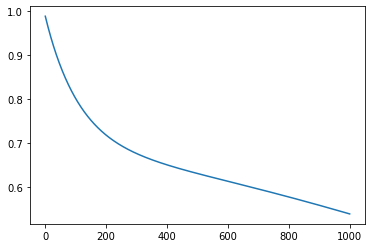

In [6]:
#loss evolution
graph_x = np.arange(0, epochs)
graph_y = lossHistory
plt.plot(graph_x, graph_y)  
plt.show()

In [7]:
def cartesian(x,y):
    #return np.transpose( [ np.tile(x, len(y)), np.repeat(y, len(x)) ] )
    a = np.tile(x, len(y))
    b = np.repeat(y, len(x))
    m = np.array([a,b])
    return m.T

def features(data):
    pass

    blue = data[data[:,2]==1]
    x_blue = blue[:,0]
    y_blue = blue[:,1]
    
    red = data[data[:,2]==0]
    x_red = red[:,0]
    y_red = red[:,1]

    plt.scatter(x_blue, y_blue, color='b')
    plt.scatter(x_red, y_red, color='r')
    #plt.scatter(data[:, 0],data[:, 1])

#features(data)


def view(w1,w2,b,xmin,xmax,ymin,ymax):
    
    x_line = np.linspace(xmin,xmax,100)
    y_line = (1/w2) * (-w1 * x_line - b)
    #, yy = np.meshgrid(x,y)
    #print(xx,yy)
    #plt.scatter(xx,yy)
    plt.ylim(ymin, ymax)
    plt.xlim(xmin, xmax)
    plt.plot(x_line, y_line)
    
    features(data)
    
def view_neuron(w,b,xmin,xmax,ymin,ymax):
    x_range = np.linspace(xmin,xmax,40)
    y_range = np.linspace(ymin,ymax,40)
    xy = cartesian(x_range, y_range)
    
    #print(xy)

    #this is all the points in range: entire rectangle
    #xx = xy[:,0]
    #yy = xy[:,1]
    #plt.scatter(xx,yy, color="blue", marker="+");
    #have to filter from all that only semnificative predictions(out): > 0.5
    
    out = activation(torch.mm(torch.from_numpy(xy),w) + b) 
    out = out.data.numpy()
     
    #add prediction(out) column
    data_prediction = np.append(xy, out, axis = 1)

    blue = data_prediction[data_prediction[:,2] > 0.5]
    xx_b = blue[:,0]
    yy_b = blue[:,1]
    #marker="," - pixel
    plt.scatter(xx_b,yy_b, color="blue", marker="+");
    
    red = data_prediction[data_prediction[:,2] < 0.5]
    xx_r = red[:,0]
    yy_r = red[:,1]
    #marker="," - pixel
    plt.scatter(xx_r,yy_r, color="red", marker="_");
       
    features(data)    
    

def view_net(x,w1,w2,b1,b2,xmin,xmax,ymin,ymax):
    x_range = np.linspace(xmin,xmax,40)
    y_range = np.linspace(ymin,ymax,40)
    xy = cartesian(x_range, y_range)
    
    #this is all the points in range: entire rectangle
    #xx = xy[:,0]
    #yy = xy[:,1]
    #plt.scatter(xx,yy, color="blue", marker="+");
    #have to filter from all that only semnificative predictions(out): > 0.5
    
    h = activation(torch.mm(torch.from_numpy(xy),w1) + b1) 
    out = activation(torch.mm(h,w2) + b2) 
    out = out.data.numpy()
 
    #add prediction(out) column
    data_prediction = np.append(xy, out, axis = 1)
    
    blue = data_prediction[data_prediction[:,2] > 0.5]
    xx_blue = blue[:,0]
    yy_blue = blue[:,1]
    #marker="," - pixel
    plt.scatter(xx_blue,yy_blue, color="blue", marker="+");

    red = data_prediction[data_prediction[:,2] < 0.5]
    xx_red = red[:,0]
    yy_red = red[:,1]
    #marker="," - pixel
    plt.scatter(xx_red,yy_red, color="red", marker="_");
    
    
    features(data)
    

tensor([[ 1.2065,  0.0969],
        [-0.0495,  0.4613]], dtype=torch.float64, requires_grad=True)
tensor([[1.2065],
        [0.0969]], dtype=torch.float64, grad_fn=<PermuteBackward>)
tensor([[-1.4681,  0.4263]], dtype=torch.float64, requires_grad=True)
tensor([[-1.4681]], dtype=torch.float64, grad_fn=<IndexBackward>)


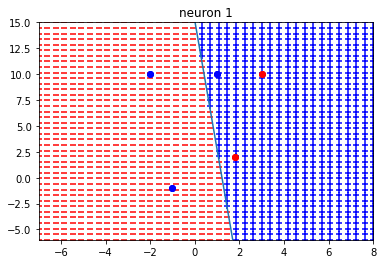

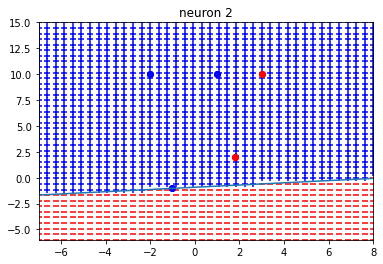

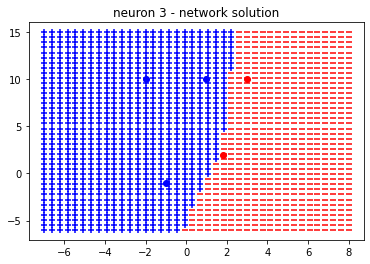

In [8]:
xmin, ymin, null = np.min(data, axis=0)
xmax, ymax, null = np.max(data, axis=0)

#increase display limits
xmin = xmin - 5
ymin = ymin - 5
xmax = xmax + 5
ymax = ymax + 5

print(w1)
print(w1[0].reshape(1,2).T)
print(b1)
print(b1[:,[0]])

view(w1[0][0].data.numpy(),w1[0][1].data.numpy(),b1[0][0].data.numpy(),xmin,xmax,ymin,ymax)
view_neuron(w1[0].reshape(1,2).T,b1[:,[0]],xmin,xmax,ymin,ymax)
#separate plots
plt.title("neuron 1")
plt.show()
view(w1[1][0].data.numpy(),w1[1][1].data.numpy(),b1[0][1].data.numpy(),xmin,xmax,ymin,ymax)
view_neuron(w1[1].reshape(1,2).T,b1[:,[1]],xmin,xmax,ymin,ymax)
#separate plots
plt.title("neuron 2")
plt.show()
view_net(x,w1,w2,b1,b2,xmin,xmax,ymin,ymax)
plt.title("neuron 3 - network solution")
plt.show()

see also (same structure, same data): <a href="https://mihaicorciu.ro/book/ml/Introduction/net1.html">/ml/Introduction/Neural network example1</a>


### Setting custom weights

In [11]:
w1 = torch.tensor( [[1, -1],
                    [1, -1]], dtype=torch.float64)
b1 = torch.tensor( [[1, -1]], dtype=torch.float64)

w2 = torch.tensor( [[ 1],
                    [-1]], dtype=torch.float64)
b2 = torch.tensor( [[ 1]], dtype=torch.float64)

h = activation(torch.mm(x,w1) + b1)
out = activation(torch.mm(h,w2) + b2)
print("---\n",out,"\n---")

---
 tensor([[0.8808],
        [0.8808],
        [0.8791],
        [0.6313],
        [0.8808]], dtype=torch.float64) 
---


In [10]:
w1 = torch.tensor( [[1, 1],
                    [1, 1]], dtype=torch.float64)
b1 = torch.tensor( [[1, 1]], dtype=torch.float64)

w2 = torch.tensor( [[ 1],
                    [ 1]], dtype=torch.float64)
b2 = torch.tensor( [[ 1]], dtype=torch.float64)

h = activation(torch.mm(x,w1) + b1)
out = activation(torch.mm(h,w2) + b2)
print("---\n",out,"\n---")

---
 tensor([[0.9526],
        [0.9526],
        [0.9518],
        [0.8232],
        [0.9526]], dtype=torch.float64) 
---
